In [227]:
from sklearn.datasets import load_breast_cancer

In [228]:
import matplotlib.pyplot as plt

In [229]:
breast = load_breast_cancer()

In [230]:
breast_data = breast.data

breast_data.shape

breast_labels = breast.target

breast_labels.shape

import numpy as np

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

final_breast_data.shape

import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names

features


features_labels = np.append(features,'label')



breast_dataset.columns = features_labels

breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [231]:
breast_dataset['label'].value_counts()

1.0    357
0.0    212
Name: label, dtype: int64

In [232]:
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [233]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=101)




In [234]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [235]:
model = Sequential()
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(30,)))

In [236]:

#model.add(Dropout(0.1, input_shape=(30,)))

In [237]:

model.add(Dense(16, activation='relu', input_shape=(30,)))
#model.add(Dropout(0.1, input_shape=(30,)))

In [238]:
# Adding the output layer
#model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [239]:
# Compiling the ANN
#classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [240]:

#output_dim = 10
#input_dim = X_train.shape[1]

batch_size = 100 
nb_epoch = 150

In [241]:
#model.fit(X_train, Y_train, batch_size=100, nb_epoch=150)
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7827 - accuracy: 0.3806 - val_loss: 0.7011 - val_accuracy: 0.4043
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.3963 - val_loss: 0.6557 - val_accuracy: 0.4362
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6691 - accuracy: 0.4278 - val_loss: 0.6161 - val_accuracy: 0.4840
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 0.6236 - accuracy: 0.4934 - val_loss: 0.5819 - val_accuracy: 0.5745
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.5826 - accuracy: 0.5459 - val_loss: 0.5521 - val_accuracy: 0.6223
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.6194 - val_loss: 0.5254 - val_accuracy: 0.6702
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.5167 - accuracy: 0.6693 - val_loss: 0.5016 - val_accuracy: 0.7287
Epoch 8/150
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0611 - accuracy: 0.9790 - val_loss: 0.1429 - val_accuracy: 0.9415
Epoch 60/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0602 - accuracy: 0.9790 - val_loss: 0.1422 - val_accuracy: 0.9415
Epoch 61/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9790 - val_loss: 0.1416 - val_accuracy: 0.9415
Epoch 62/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 0.9790 - val_loss: 0.1409 - val_accuracy: 0.9415
Epoch 63/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9843 - val_loss: 0.1403 - val_accuracy: 0.9468
Epoch 64/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9843 - val_loss: 0.1396 - val_accuracy: 0.9468
Epoch 65/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9843 - val_loss: 0.1391 - val_accuracy: 0.9468
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.1238 - val_accuracy: 0.9362
Epoch 118/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.1237 - val_accuracy: 0.9362
Epoch 119/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.1236 - val_accuracy: 0.9362
Epoch 120/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.1236 - val_accuracy: 0.9362
Epoch 121/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.1235 - val_accuracy: 0.9362
Epoch 122/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.1233 - val_accuracy: 0.9362
Epoch 123/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.1231 - val_accuracy: 0.9362
Epoch 124/150
4/4 [========

In [242]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

array([[9.97157753e-01],
       [9.87037063e-01],
       [9.97267604e-01],
       [4.30852175e-04],
       [9.99972820e-01],
       [9.99531269e-01],
       [9.99966145e-01],
       [5.17113242e-14],
       [9.95443642e-01],
       [9.99368668e-01],
       [1.15191455e-07],
       [9.98521686e-01],
       [9.79276657e-01],
       [9.99484539e-01],
       [5.01035458e-07],
       [9.99203920e-01],
       [9.99268413e-01],
       [9.99823451e-01],
       [9.02116645e-11],
       [1.37044638e-01],
       [9.88338649e-01],
       [9.99651670e-01],
       [9.97923374e-01],
       [9.99731779e-01],
       [1.81711107e-06],
       [9.94153917e-01],
       [2.16847525e-07],
       [9.99998450e-01],
       [8.88111629e-08],
       [6.77019358e-04],
       [3.50108981e-01],
       [1.90292267e-05],
       [9.59936142e-01],
       [4.28241491e-03],
       [9.99964237e-01],
       [9.99981880e-01],
       [1.33007765e-04],
       [4.01171744e-02],
       [1.70748660e-08],
       [1.80000875e-11],


In [243]:
y_pred = (y_pred > 0.5)


In [244]:
y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [245]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [246]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1]+ cm[0][1] + cm[1][0]))*100))

Our accuracy is 94.14893617021278%


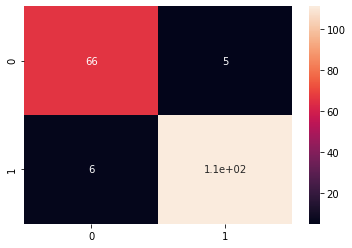

In [247]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [223]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.10117045789957047
Test accuracy: 0.9680851101875305


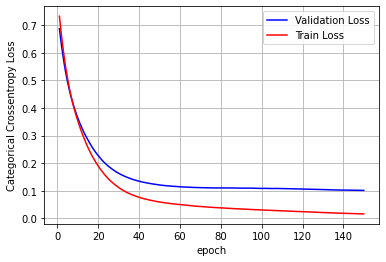

In [224]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Random Forest Model

In [316]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)




#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print('Shapes:\nx_train:%s\ny_train:%s\n' % (x_train.shape,y_train.shape))
print('x_test:%s\ny_test:%s\n'%(x_test.shape,y_test.shape))

Shapes:
x_train:(398, 30)
y_train:(398,)

x_test:(171, 30)
y_test:(171,)



In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label

labels = y
labels = labels.astype('str')

encoded = LabelEncoder()
labels = encoded.fit_transform(y)

#sc = StandardScaler()
#X = sc.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.3,
                                                   random_state=42)

print('Shapes:\nx_train:%s\ny_train:%s\n' % (x_train.shape,y_train.shape))
print('x_test:%s\ny_test:%s\n'%(x_test.shape,y_test.shape))
#x_train.head()

Shapes:
x_train:(398, 30)
y_train:(398,)

x_test:(171, 30)
y_test:(171,)



In [323]:
# rf classification
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,
                                   bootstrap=True,
                                   max_features='sqrt',
                                   random_state=42
                                      )

rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [324]:
# Actual class predictions
y_pred = rf_classifier.predict(x_test)
# Probabilities for each class
rf_probs = rf_classifier.predict_proba(x_test)[:,] # 5 clusters from hdbscan
rf_probs

array([[0.03, 0.97],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.76, 0.24],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.95, 0.05],
       [0.11, 0.89],
       [0.89, 0.11],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.06, 0.94],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.24, 0.76],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.11, 0.89],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.62, 0.38],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.34, 0.66],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.02,

In [325]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class']))

Predicted Class   0    1
Actual Class            
0                59    4
1                 1  107


In [326]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.99      0.96      0.98       111

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Our accuracy is 97.07602339181285%


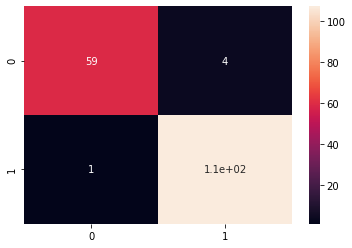

In [327]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1]+ cm[0][1] + cm[1][0]))*100))

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')